In [1]:
import modules.latent_space_mapping2
import modules.restore_networks
import modules.visualization
from os.path import split
import resources.sinusoidal
import numpy as np
# Matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import win32api
%matplotlib inline

Mapping of the latent spaces in a correct form. 

## Encoded Data

In [2]:
original_normal = np.load('normal_encoding.npy')
original_hk = np.load('hk_encoding.npy')

## Previously trained models

In [3]:
PATH = "C:\\Users\\Luis Pérez\\Documents\\Master\\TUE\\Final Project\\TensorFlow Models"
df = modules.restore_networks.dataframe_graphs_in_folder(PATH)

C:\Users\Luis Pérez\Documents\Master\TUE\Final Project\TensorFlow Models\models
['2DSimpleDecoder', 'CommutativeSinusoid', 'CommutativeTorus', 'DecoderSavingTest', 'HKencoding', 'HumanDecoder', 'JoiningTest', 'NormalDecoder']
             Experiment                                          Filenames
0       2DSimpleDecoder  2DSimpleDecoder2018-05-09-09-52_2DPhases.ckpt....
1       2DSimpleDecoder   2DSimpleDecoder2018-05-09-12-21_Normal.ckpt.meta
2       2DSimpleDecoder   2DSimpleDecoder2018-05-09-12-54_Normal.ckpt.meta
3       2DSimpleDecoder   2DSimpleDecoder2018-05-09-13-05_Normal.ckpt.meta
4       2DSimpleDecoder  2DSimpleDecoder2018-05-09-13-05_Normal_decoder...
5       2DSimpleDecoder   2DSimpleDecoder2018-05-09-13-10_Normal.ckpt.meta
6       2DSimpleDecoder  2DSimpleDecoder2018-05-09-13-10_Normal_decoder...
7       2DSimpleDecoder   2DSimpleDecoder2018-05-09-14-26_Normal.ckpt.meta
8       2DSimpleDecoder  2DSimpleDecoder2018-05-09-14-26_Normal_decoder...
9   CommutativeSinusoid 

In [4]:
dictionary_variables = modules.restore_networks.join_two_experiments(PATH, df, 9, 10)

C:\Users\Luis Pérez\Documents\Master\TUE\Final Project\TensorFlow Models\models\CommutativeSinusoid\weights\HumanDecoder2018-05-07-15-23_Phases.ckpt.meta restored

C:\Users\Luis Pérez\Documents\Master\TUE\Final Project\TensorFlow Models\models\CommutativeSinusoid\weights\JoiningTest2018-05-03-11-19_HeatKernel.ckpt.meta restored



In [5]:
# Define the decoder architecture
vae = modules.latent_space_mapping2.vae_nn_mapping(0.001, (2,0), 50)

Mapping from Human to HeatKernel


In [7]:
# Join and recover two models
name = "human_normal2.cpkt"
time_str = time.strftime("%Y-%m-%d-%H-%M_")
JOINED_MODEL_PATH = PATH+'\\joined_models\\'+name
DIR_TENSORBOARD = PATH+'\\joined_models\\tensorboard\\'+name+time_str
vae.assign_values(dictionary_variables, JOINED_MODEL_PATH)

Loading the weight of the variables ...
Loading the variable decoder_Human/h_dec_Human/kernel:0...

Loading the variable decoder_Human/h_dec_Human/bias:0...

Loading the variable decoder_Human/h_dec2_Human/kernel:0...

Loading the variable decoder_Human/h_dec2_Human/bias:0...

Loading the variable decoder_Human/x_r_Human/kernel:0...

Loading the variable decoder_Human/x_r_Human/bias:0...

Loading the variable decoder_HeatKernel/h_dec_HeatKernel/kernel:0...

Loading the variable decoder_HeatKernel/h_dec_HeatKernel/bias:0...

Loading the variable decoder_HeatKernel/h_dec2_HeatKernel/kernel:0...

Loading the variable decoder_HeatKernel/h_dec2_HeatKernel/bias:0...

Loading the variable decoder_HeatKernel/x_r_HeatKernel/kernel:0...

Loading the variable decoder_HeatKernel/x_r_HeatKernel/bias:0...

Finished loading variables.


In [8]:
vae.train(10000, epochs = 10000, log_dir_tensorboard=DIR_TENSORBOARD, weights_folder=JOINED_MODEL_PATH)

Restoring saved parameters
Epoch 0 | Loss: 5.22E+01 
Epoch 1 | Loss: 5.14E+01 
Epoch 2 | Loss: 5.16E+01 
Epoch 3 | Loss: 5.12E+01 
Epoch 4 | Loss: 5.18E+01 
Epoch 5 | Loss: 5.18E+01 
Epoch 6 | Loss: 5.08E+01 
Epoch 7 | Loss: 5.10E+01 
Epoch 8 | Loss: 5.12E+01 
Epoch 9 | Loss: 5.10E+01 
Epoch 10 | Loss: 5.16E+01 
Epoch 11 | Loss: 5.18E+01 
Epoch 12 | Loss: 5.18E+01 
Epoch 13 | Loss: 5.09E+01 
Epoch 14 | Loss: 5.07E+01 
Epoch 15 | Loss: 5.15E+01 
Epoch 16 | Loss: 5.08E+01 
Epoch 17 | Loss: 5.14E+01 
Epoch 18 | Loss: 5.15E+01 
Epoch 19 | Loss: 5.06E+01 
Epoch 20 | Loss: 5.14E+01 
Epoch 21 | Loss: 5.16E+01 
Epoch 22 | Loss: 5.10E+01 
Epoch 23 | Loss: 5.10E+01 
Epoch 24 | Loss: 5.13E+01 
Epoch 25 | Loss: 5.08E+01 
Epoch 26 | Loss: 5.06E+01 
Epoch 27 | Loss: 5.15E+01 
Epoch 28 | Loss: 5.09E+01 
Epoch 29 | Loss: 5.10E+01 
Epoch 30 | Loss: 5.10E+01 
Epoch 31 | Loss: 5.09E+01 
Epoch 32 | Loss: 5.12E+01 
Epoch 33 | Loss: 5.06E+01 
Epoch 34 | Loss: 5.08E+01 
Epoch 35 | Loss: 5.04E+01 
Epoch 36 | 

In [9]:
samples, mapped_samples = vae.map_latent_space(1000, weights_folder=JOINED_MODEL_PATH)
samples2, embedded_samples = vae.map_latent_space_embedded(1000, weights_folder=JOINED_MODEL_PATH)
decoded_input, decoded_output = vae.decode_codes(samples2, weights_folder = JOINED_MODEL_PATH)

IndexError: index 1 is out of bounds for axis 1 with size 1

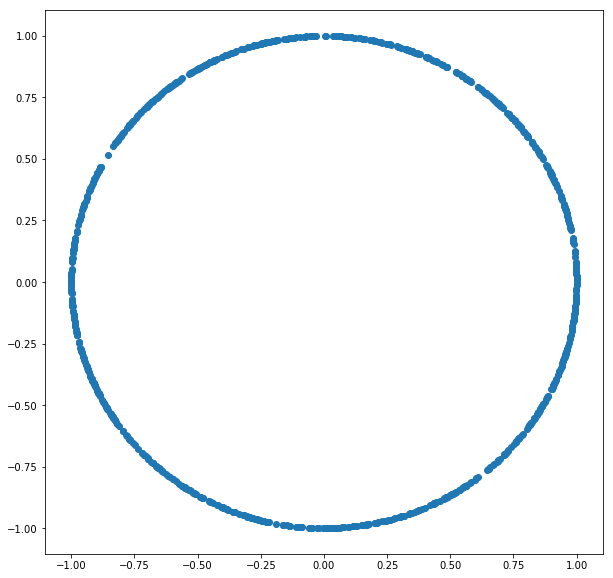

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(np.cos(np.pi*samples), np.sin(np.pi*samples))
plt.scatter(mapped_samples[:,0], mapped_samples[:,1],c = np.arange(len(samples)), cmap = cm.bone)
plt.scatter(original_normal[:,0], original_normal[:,1],c = np.arange(len(original_normal)), cmap = cm.bone)
# plt.scatter(original_hk[:,0], original_hk[:,1],c = np.arange(len(original_normal)), cmap = cm.plasma)
plt.grid()

In [20]:
import matplotlib as mp
a = mp.cm.ScalarMappable(cmap='gray')

In [27]:
b = a.get_array()

In [30]:
print(b)

None


AttributeError: Unknown property cmap

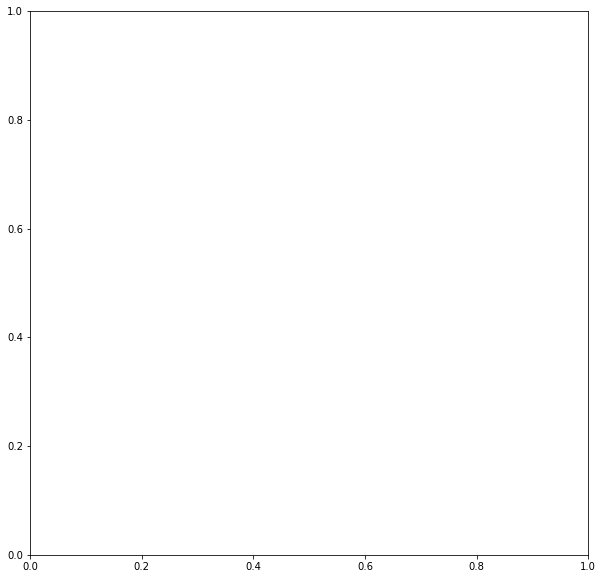

In [15]:
plt.figure(figsize=(10,10))
# plt.scatter(np.cos(np.pi*samples), np.sin(np.pi*samples))
plt.plot(np.cos(np.pi*samples), np.sin(np.pi*samples), ls="", marker="o", c = np.arange(len(samples)), cmap = cm.bone)
# plt.scatter(np.cos(np.pi*mapped_samples), np.sin(np.pi*mapped_samples))
# plt.scatter(original_normal[:,0], original_normal[:,1],c = np.arange(len(original_normal)), cmap = cm.bone)
# plt.scatter(original_hk[:,0], original_hk[:,1],c = np.arange(len(original_normal)), cmap = cm.plasma)
plt.grid()

In [ ]:
vae.evaluate_latent_space_samples(1000, weights_folder=JOINED_MODEL_PATH)

In [ ]:
embedding = np.concatenate((np.cos(np.pi*samples2), np.sin(np.pi*samples2)),axis =-1)

In [ ]:
samples2 = samples2[np.argsort(samples2, axis = 0)[:,0]]

In [ ]:
samples2 = samples2[np.argsort(samples2, axis = 0)]

In [ ]:
%matplotlib qt5
modules.visualization.plot_latent_space_mapping(embedding, embedded_samples, decoded_input, decoded_output)